In [1]:
from pathlib import Path
from datetime import datetime, timedelta
from docx import Document
import matplotlib.pyplot as plt
from pathlib import Path
import json
import re

In [2]:
# Function to generate all Sundays within a range
def generate_sundays(start_date, end_date):
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        current_date += timedelta(days=7)

def read_docx(file_path):
    doc = Document(file_path)
    content = {}

    for i, paragraph in enumerate(doc.paragraphs, start=1):
        # Skip empty paragraphs
        if paragraph.text.strip():
            content[f'Line {i}'] = paragraph.text.strip()

    return content

In [3]:
# Specify the range of dates
start_date = datetime.strptime("2022-01-02", "%Y-%m-%d")
end_date = datetime.strptime("2023-11-19", "%Y-%m-%d")

# Get the list of existing files
existing_files = sorted(Path("Worship Books").rglob("*.docx"))

# Extract dates from the file names
existing_dates = [datetime.strptime(file.stem, "%Y-%m-%d") for file in existing_files]

# Check for missing dates
missing_dates = [date.strftime("%Y-%m-%d") for date in generate_sundays(start_date, end_date) if date not in existing_dates]

# Print the missing dates
if missing_dates:
    print("Missing Dates:")
    for date in missing_dates:
        print(date)
else:
    print("All dates are present.")

Missing Dates:
2023-06-11


In [4]:
jk = list(Path.cwd().rglob("*.docx"))

parsed_contents_dict = {}

for file_path in jk:
    parsed_contents = read_docx(file_path)

    # Only add to the dictionary if there is content
    if parsed_contents:
        parsed_contents_dict[file_path.stem] = parsed_contents

# Save to JSON file
json_file_path = "worshipbook.json"
with open(json_file_path, 'w') as json_file:
    json.dump(parsed_contents_dict, json_file, indent=2)

print(f"Data saved to {json_file_path}")


Data saved to worshipbook.json


In [5]:

test_dict = {}

for i in list(parsed_contents_dict.keys()):
    first_lesson = ''
    second_lesson = ''
    gospel_lesson = ''
    benediction = ''
    entrance_psalm = ''
    adoration_prayer = ''
    absolution = ''
    opening_call = ''

    input_list = list(parsed_contents_dict[i].values())
    
    # Remove special characters and extra whitespaces
    input_list = [re.sub(r'\s+', ' ', item.replace('\xa0', ' ').replace('\t', ' ').strip()) for item in input_list]

    # Extracting items between "Adoration and L" and "Nikolai Kedrov" for Prayer of Adoration
    start_index = None
    end_index = None

    for idx, item in enumerate(input_list):
        if "Adoration and L" in item:
            start_index = idx + 1  # Start from the next item
        elif "Nikolai Kedrov" in item:
            end_index = idx
            break  # Stop searching once you find the end
        
    if start_index is not None and end_index is not None:
        result_list = input_list[start_index:end_index]
        result_list = ' '.join(result_list)
        result_list = result_list.rsplit("Now hear us as we sing the prayer our", 1)[0].strip()
        adoration_prayer = result_list.replace("  ", " ")
    else:
        adoration_prayer = ''

    # Extracting items between "good news" and "Lift up your hearts" for Absolution
    start_index = None
    end_index = None

    for idx, item in enumerate(input_list):
        if "good news" in item:
            start_index = idx + 1  # Start from the next item
        elif "Lift up your hearts" in item:
            end_index = idx
            break  # Stop searching once you find the end
        
    if start_index is not None and end_index is not None:
        result_list = input_list[start_index:end_index]
        result_list = ' '.join(result_list)
        result_list = result_list.rsplit("Now hear us as we sing the prayer our", 1)[0].strip()
        absolution = result_list.replace("  ", " ")
    else:
        absolution = ''

    # Extracting "Entrance Psalm"
    for j, k in enumerate(input_list):
        cleaned_value = ' '.join(k.replace('\t', ' ').split())

        if "Entrance Psalm" in k:
            entrance_psalm = cleaned_value.split("Entrance ", 1)[-1].strip()

    # Extracting other lessons and benediction
    for j, k in enumerate(input_list):
        cleaned_value = ' '.join(k.replace('\t', ' ').split())

        if "Second Lesson" in k:
            second_lesson = cleaned_value.split("Second Lesson", 1)[-1].strip()
        elif "First Lesson" in k:
            first_lesson = cleaned_value.split("First Lesson", 1)[-1].strip()
        elif "Gospel Lesson" in k:
            gospel_lesson = cleaned_value.split("Gospel Lesson", 1)[-1].strip()
        elif "THE BENEDICTION" in k:
            benediction = cleaned_value.split("THE BENEDICTION", 1)[-1].strip().replace("…", "").replace(".", "")
        elif "Psalm" in k and opening_call == '' and j != 0:
            opening_call = ' '.join(input_list[1:j]).strip()

    # Add a dictionary for the date i with "First Lesson", "Second Lesson", and "Gospel Lesson" keys
    test_dict[i] = {
        "Entrance Psalm": entrance_psalm,
        "First Lesson": first_lesson, 
        "Second Lesson": second_lesson, 
        "Gospel Lesson": gospel_lesson,
        "Benediction": benediction,
        "Prayer of Adoration": adoration_prayer,
        "Absolution": absolution,
        "Opening Call": opening_call
    }


test_dict['2022-05-01']['Absolution'] = "We extol You, Lord, for lifting us up above the rejoicing of our enemies – for bringing us healing by the wounds of our Lord Jesus – and bringing up our souls from the grave by His rising again to new life – the precious guarantee to us that our weeping in the night will give way to joy in the morning. Gracious God, we will give thanks to You forever."

#test_dict['2023-08-20']['Absolution'] = 
#test_dict['2023-06-04']['Absolution'] = 
#test_dict['2023-04-23']['Absolution'] = 
#test_dict['2022-08-28']['Absolution'] = 
#test_dict['2022-06-12']['Absolution'] = 

test_dict

{'2022-12-25': {'Entrance Psalm': 'Psalm 2',
  'First Lesson': '',
  'Second Lesson': 'Hebrews 1:1-6',
  'Gospel Lesson': 'John 1:1-14',
  'Benediction': ' I Thessalonians 5:23-24',
  'Prayer of Adoration': '',
  'Absolution': 'I John 1:8-9; 4:10 - If we say that we have no sin, we deceive ourselves, and the truth is not in us. If we confess our sins, He is faithful and just to forgive us our sins and to cleanse us from all unrighteousness….Herein is love, not that we loved God, but that He loved us and sent His Son to be the propitiation for our sins. To you who have confessed the truth – that you have sin – asking God’s forgiveness by faith in Christ – the Father assures you that He has heard your prayer and that for the Son’s sake all our sins are forgiven.',
  'Opening Call': 'FIRST SUNDAY AFTER CHRISTMAS Isaiah 52 - How beautiful upon the mountain are the feet of him that brings good tidings – that says unto Zion, Your God reigns! Break forth into joy! Sing together, you waste pla

In [6]:
# Find keys where Absolution is blank
keys_with_blank_absolution = [key for key, value in test_dict.items() if value.get('Absolution') == '']

print(keys_with_blank_absolution)

['2023-08-20', '2023-06-04', '2023-04-23', '2022-08-28', '2022-06-12']


In [7]:
import pandas as pd

# Assuming test_dict is your dictionary
data = []

for date, lessons in test_dict.items():
    row = {'Date': date}
    row.update(lessons)
    data.append(row)

df = pd.DataFrame(data)
df = df.sort_values(by='Date', ascending=False)
df = df.reset_index(drop=True)
df

Date  Entrance Psalm                      First Lesson  \
0   2023-11-19                                                     
1   2023-11-12  Psalm Psalm 70                                     
2   2023-11-05                                                     
3   2023-10-29           Psalm                 Revelation 14:6-7   
4   2023-10-22        Psalm 96  Isaiah 45.1-7 & 2 Timothy 2.1-13   
..         ...             ...                               ...   
93  2022-01-30           Psalm                                     
94  2022-01-23           Psalm                                     
95  2022-01-16           Psalm                                     
96  2022-01-09                                                     
97  2022-01-02           Psalm                                     

                              Second Lesson     Gospel Lesson  \
0   s Zephaniah 1:7-16 & 2 Timothy 3:16-4:8  Matthew 25:14-30   
1                                             Matthew 25:1-13   
2                                              Matthew 5:1-12   
3                         2 Timothy 2.14-26      John 8:31-36   
4                                            Matthew 22.15-22   
..                                      ...               ...   
93                                               Luke 4:31-44   
94                                               Luke 4:16-30   
95                                                John 2:1-11   
96                                               Luke 3:15-22   
97                                               Luke 2:40-52   

                  Benediction  \
0    II Thessalonians 2:16-17   
1                               
2            Hebrews 13:20-21   
3                 2 Timothy 4   
4                               
..                        ...   
93            Philippians 4:7   
94                              
95               Romans 15:33   
96               Romans 15:13   
97            Numbers 6:24-26   

                                  Prayer of Adoration  \
0   Praise waits for You among Your people, Heaven...   
1                                                       
2                                                       
3                                                       
4                                                       
..                                                ...   
93  Almighty and Heavenly Father, we, Your childre...   
94  Almighty God and our Heavenly Father, fill You...   
95  Your glory, Lord, is beyond human contemplatio...   
96  Blessed are You, O Lord the God of Jacob our F...   
97                                                      

                                           Absolution  \
0   [The Lord said to Israel]: “…I will pass throu...   
1   Out of the depths have I cried to You, O Lord;...   
2   John’s Gospel [ 4:13-14; 7:37] [Jesus said]: "...   
3   Now we know that whatever the law says, it say...   
4   Hear now the comforting assurance of the grace...   
..                                                ...   
93  Once again: (Col 1) Give thanks to the Father ...   
94  (Col 1) give thanks to the Father who has qual...   
95  Blessed is he whose transgression is forgiven,...   
96  [The Lord said to Israel]: “…I will pass throu...   
97  [The Lord said to Moses]: "I will make all My ...   

                                         Opening Call  
0                                                      
1   Hebrews 13 - 10 We have an altar from which th...  
2                                                      
3   Psalm 96 - Great is the Lord, and greatly to b...  
4   23rd Sunday after Pentecost HEB 10 - Brethren,...  
..                                                ...  
93  Fourth Sunday after Epiphany Our help is in th...  
94  Third Sunday after Epiphany Make a joyful nois...  
95  Second Sunday after Epiphany Worship the Lord ...  
96  First Sunday after Epiphany – The Baptism of O...  
97  “We do not have a High Pr

In [8]:
df.to_csv("worshipbook.csv")

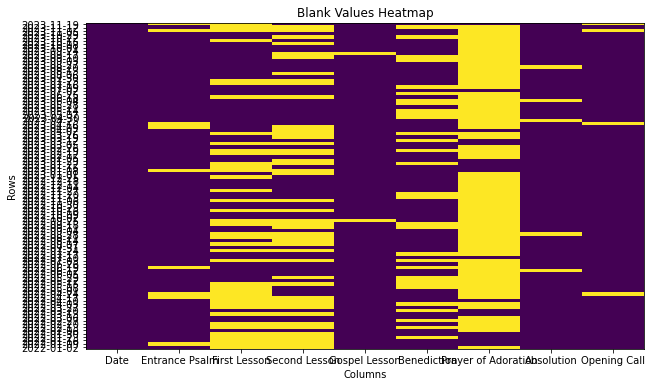

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Create a boolean DataFrame where True represents a blank cell
blank_matrix = df.applymap(lambda x: x == '')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(blank_matrix, cmap='viridis', aspect='auto')

# Customize the plot
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df)), df['Date'].dt.strftime('%Y-%m-%d'))
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Blank Values Heatmap')

plt.show()

In [10]:
missing_matrix = df.applymap(lambda x: x == '')

# Calculate percentage of missing values for each column
percentage_missing = (missing_matrix.sum() / len(missing_matrix)) * 100

percentage_missing = percentage_missing.to_frame().reset_index()
percentage_missing.columns = ['Features', 'Percent Missing']

percentage_missing

Features  Percent Missing
0                 Date         0.000000
1       Entrance Psalm         9.183673
2         First Lesson        41.836735
3        Second Lesson        46.938776
4        Gospel Lesson         2.040816
5          Benediction        31.632653
6  Prayer of Adoration        82.653061
7           Absolution         5.102041
8         Opening Call         4.081633

In [11]:
songs = pd.read_excel(, header=)

In [23]:
custom_headers = {
    'Column1': 'Date',
    'Column2': 'Type',
    'Column3': 'Title',
    'Column4': 'Time',

    # Add more column mappings as needed
}

# Read the Excel file with custom headers
songs = pd.read_excel("Song_List.xlsx", names=custom_headers.values())

# Assuming df is your DataFrame
# Create a new row as a dictionary
new_row = {
    'Date': '2021-01-03',
    'Type': 'Entrance Hymn',
    'Title': 'Unto Me the Word Remember',
    'Time': 'Christmas'
}

			

# Convert the dictionary to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Concatenate the new row DataFrame with the original DataFrame, placing the new row at the top
songs = pd.concat([new_row_df, songs]).reset_index(drop=True)

songs['Date'] = pd.to_datetime(songs['Date']).dt.strftime('%Y-%m-%d')


# Display the DataFrame with the new row at the top
songs.head(12)

Date              Type                                    Title  \
0   2021-01-03     Entrance Hymn                Unto Me the Word Remember   
1   2021-01-03         Offertory        Who is This So Weak and Helpless?   
2   2021-01-03             Bread            Of the Father’s Love Begotten   
3   2021-01-03               Cup            Hark! The Herald Angels Sing!   
4   2021-01-03  Hymn of Response             Angels We Have Heard on High   
5   2021-01-10     Entrance Hymn  Why Do the Heathen Nations Vainly Rage?   
6   2021-01-10         Offertory              O You Mighty, Give the Lord   
7   2021-01-10             Bread                               The Lorica   
8   2021-01-10               Cup    O Love, How Deep, How Broad, How High   
9   2021-01-10  Hymn of Response         Mighty Lord, Extend Your Kingdom   
10  2021-01-17     Entrance Hymn                    I Waited for the Lord   
11  2021-01-17         Offertory                        From East to West   

         Time  
0   Christmas  
1   Christmas  
2   Christmas  
3   Christmas  
4   Christmas  
5    Epiphany  
6    Epiphany  
7    Epiphany  
8    Epiphany  
9    Epiphany  
10   Epiphany  
11   Epiphany

In [69]:
time_of_year = songs[['Date', 'Time']]
time_of_year['Date'] = pd.to_datetime(time_of_year['Date'])
# Assuming time_of_year is your DataFrame containing 'Date' and 'Time' columns
# Drop duplicate rows
time_of_year = time_of_year.drop_duplicates()
time_of_year = time_of_year.reset_index(drop=True)

# Display the DataFrame
time_of_year

/var/folders/k5/fc_k_ty94ynft_v14q6p7q6m0000gn/T/ipykernel_92861/2993157554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_of_year['Date'] = pd.to_datetime(time_of_year['Date'])


Date       Time
0   2021-01-03  Christmas
1   2021-01-10   Epiphany
2   2021-01-17   Epiphany
3   2021-01-24   Epiphany
4   2021-01-31   Epiphany
..         ...        ...
163 2024-02-25       Lent
164 2024-03-03       Lent
165 2024-03-10       Lent
166 2024-03-17       Lent
167 2024-03-24       Lent

[168 rows x 2 columns]

In [70]:
songs.Type.value_counts()

Entrance Hymn       168
Offertory           168
Bread               168
Cup                 168
Hymn of Response    168
Epistle Hymn         80
Name: Type, dtype: int64

In [71]:
# Pivot the DataFrame
df_pivot = songs.pivot_table(index='Date', columns='Type', values='Title', aggfunc=lambda x: ' '.join(x))

# Reset index to make 'Date' a column again
df_pivot.reset_index(inplace=True)

# Remove the index name
df_pivot.index.name = None

# Reset the name of the columns index to None
df_pivot.columns.name = None

# Reorder the columns as specified
df_pivot = df_pivot[['Date', 'Entrance Hymn', 'Epistle Hymn', 'Offertory', 'Bread', 'Cup', 'Hymn of Response']]

df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])

# Display the transformed DataFrame
df_pivot

Date                            Entrance Hymn  \
0   2021-01-03                Unto Me the Word Remember   
1   2021-01-10  Why Do the Heathen Nations Vainly Rage?   
2   2021-01-17                    I Waited for the Lord   
3   2021-01-24             My Spirit Looks to God Alone   
4   2021-01-31              Earth has Many a Noble City   
..         ...                                      ...   
163 2024-02-25                    I Waited for the Lord   
164 2024-03-03              O Lord of Hosts, How Lovely   
165 2024-03-10                         Holy, Holy, Holy   
166 2024-03-17         Before Thee Let My Cry Come Near   
167 2024-03-24                All Glory, Laud and Honor   

                         Epistle Hymn                          Offertory  \
0                                 NaN  Who is This So Weak and Helpless?   
1                                 NaN        O You Mighty, Give the Lord   
2                                 NaN                  From East to West   
3                                 NaN       A Mighty Fortress is Our God   
4                                 NaN      We Sing, Immanuel, Thy Praise   
..                                ...                                ...   
163                      Rock of Ages      Let Thy Blood in Mercy Poured   
164         Great is Thy Faithfulness   How Sweet and Awful is the Place   
165             Arise, My Soul, Arise     I Heard the Voice of Jesus Say   
166       The Church’s One Foundation         Jesus, Refuge of the Weary   
167  The Son of God Goes Forth To War          O Sacred Head Now Wounded   

                                  Bread  \
0         Of the Father’s Love Begotten   
1                            The Lorica   
2      How Sweet and Awful is the Place   
3     All Hail the Power of Jesus’ Name   
4      Praise to the Lord, the Almighty   
..                                  ...   
163           The God of Abrah’m Praise   
164        As the Hart, About to Falter   
165        My Soul, Now Bless Thy Maker   
166                       Let God Arise   
167  Sing My Tongue the Glorious Battle   

                                                Cup  \
0                     Hark! The Herald Angels Sing!   
1             O Love, How Deep, How Broad, How High   
2                   Behold a Host, Arrayed in White   
3    Brightest and Best of the Stars of the Morning   
4                         Great is Thy Faithfulness   
..                                              ...   
163                When I Survey the Wondrous Cross   
164              Only Begotten, Word of God Eternal   
165                                   Amazing Grace   
166                Jesus Christ, Our Blessed Savior   
167                              O Come With Thanks   

                     Hymn of Response  
0        Angels We Have Heard on High  
1    Mighty Lord, Extend Your Kingdom  
2    Mighty Lord, Extend Your Kingdom  
3    Mighty Lord, Extend Your Kingdom  
4    Mighty Lord, Extend Your Kingdom  
..                                ...  
163          O God of Earth and Altar  
164          O God of Earth and Altar  
165          O God of Earth and Altar  
166          O God of Earth and Altar  
167               The Lorica v. 7 & 8  

[168 rows x 7 columns]

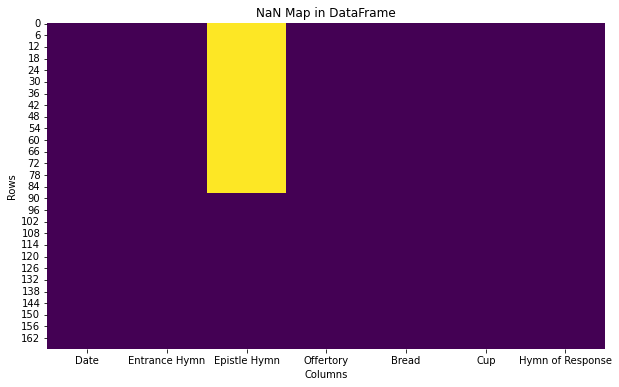

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a boolean DataFrame indicating NaN values
nan_map = df_pivot.isna()

# Visualize the NaN map
plt.figure(figsize=(10, 6))
sns.heatmap(nan_map, cmap='viridis', cbar=False)
plt.title('NaN Map in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [90]:
# Assuming df_pivot is your pivot DataFrame and you have another DataFrame named 'other_df' to merge with
# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(df_pivot, df, on='Date', how='inner')
merged_df = pd.merge(merged_df, time_of_year, on='Date', how='inner')

# Display the merged DataFrame
merged_df

Date                            Entrance Hymn  \
0  2022-01-02                  O Come, All Ye Faithful   
1  2022-01-09  Why Do the Heathen Nations Vainly Rage?   
2  2022-01-16                        From East to West   
3  2022-01-23         LORD, Our Lord, In All the Earth   
4  2022-01-30              Earth has Many a Noble City   
..        ...                                      ...   
93 2023-10-22      All Praise to God, Who Reigns Above   
94 2023-10-29         Beneath the Blood-Stained Lintel   
95 2023-11-05        All People That on Earth Do Dwell   
96 2023-11-12            O Sing A New Song To The Lord   
97 2023-11-19                 At the Lamb’s High Feast   

                          Epistle Hymn  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
..                                 ...   
93     Whoever Dwells in God Most High   
94        A Mighty Fortress is Our God   
95     Behold a Host, Arrayed in White   
96  God, My King, Thy Might Confessing   
97               Arise, My Soul, Arise   

                                 Offertory  \
0             Lo, How a Rose Ever Blooming   
1              O You Mighty, Give the Lord   
2         How Sweet and Awful is the Place   
3            We Sing, Immanuel, Thy Praise   
4             A Mighty Fortress is Our God   
..                                     ...   
93                        Holy, Holy, Holy   
94  I Greet Thee, Who My Sure Redeemer Art   
95        The Son of God Goes Forth To War   
96            Holy God, We Praise Thy Name   
97  Ah, Holy Jesus, How Hast Thou Offended   

                                  Bread  \
0            Once in Royal David’s City   
1                            The Lorica   
2      When I Survey the Wondrous Cross   
3   All Praise to God, Who Reigns Above   
4             Great is Thy Faithfulness   
..                                  ...   
93       I Will Sing My Maker’s Praises   
94     Jesus Christ, Our Blessed Savior   
95                   For All the Saints   
96                           The Lorica   
97     Praise to the Lord, the Almighty   

                                               Cup  \
0                     Angels We Have Heard on High   
1            O Love, How Deep, How Broad, How High   
2                  Behold a Host, Arrayed in White   
3   Brightest and Best of the Stars of the Morning   
4                 Praise to the Lord, the Almighty   
..                                             ...   
93                               Be Thou My Vision   
94                              O Come With Thanks   
95                  From All Thy Saints in Warfare   
96              Only Begotten, Word of God Eternal   
97                      Crown Him with Many Crowns   

                         Hymn of Response  Entrance Psalm  \
0                       Joy to the World!           Psalm   
1        Mighty Lord, Extend Your Kingdom                   
2        Mighty Lord, Extend Your Kingdom           Psalm   
3        Mighty Lord, Extend Your Kingdom           Psalm   
4        Mighty Lord, Extend Your Kingdom           Psalm   
..                                    ...             ...   
93  Father, We Thank Thee Who Has Planted        Psalm 96   
94  Father, We Thank Thee Who Has Planted           Psalm   
95    Lord, Keep us Steadfast in Thy Word                   
96    Lord, Keep us Steadfast in Thy Word  Psalm Psalm 70   
97    Lord, Keep us Steadfast in Thy Word                   

                        First Lesson                            Second Lesson  \
0                                                                               
1                                                                               
2                                                                               
3                              

In [91]:
merged_df.columns

Index(['Date', 'Entrance Hymn', 'Epistle Hymn', 'Offertory', 'Bread', 'Cup',
       'Hymn of Response', 'Entrance Psalm', 'First Lesson', 'Second Lesson',
       'Gospel Lesson', 'Benediction', 'Prayer of Adoration', 'Absolution',
       'Opening Call', 'Time'],
      dtype='object')

In [92]:
import numpy as np

# Add blank columns to the merged DataFrame
merged_df['Entrance Call to Worship Prelude'] = np.nan
merged_df['Entrance Call to Worship'] = np.nan
merged_df['Confession of Sins Prelude'] = np.nan
merged_df['Confession of Sins'] = np.nan
merged_df['Assurance of Forgiveness Prelude'] = np.nan
merged_df['Absolution'] = np.nan
merged_df['Prayer for Illumination'] = np.nan
merged_df['Presentation of Tithes and Offerings Passage Prelude'] = np.nan
merged_df['Presentation of Tithes and Offerings'] = np.nan
merged_df['Prayer for the Church and the World Prelude'] = np.nan
merged_df['Prayer for the Church and the World Local Church'] = np.nan
merged_df['Prayer for the Church and the World MOW'] = np.nan
merged_df['Prayer for the Church and the World Persecuted Saints'] = np.nan
merged_df['Prayer for the Church and the World Suffering Saints'] = np.nan
merged_df['Prayer for the Church and the World Expecting Mothers'] = np.nan
merged_df['Prayer for the Church and the World Culture and Nation'] = np.nan
merged_df['Prayer for the Church and the World Epilogue'] = np.nan
merged_df['Prayer Giving Thanks for the Bread'] = np.nan
merged_df['Prayer Giving Thanks for the Cup'] = np.nan
merged_df['The Great Commission'] = np.nan
# Add more blank columns as needed

service_order = [
    "Date",
    'Time',
    'Entrance Call to Worship Prelude',
    'Entrance Call to Worship',
    'Entrance Hymn',
    'Entrance Psalm',
    'Prayer of Adoration',
    'Confession of Sins Prelude',
    'Confession of Sins',
    'Assurance of Forgiveness Prelude',
    'Absolution',
    'First Lesson',
    'Second Lesson',
    'Epistle Hymn',
    'Gospel Lesson',
    'Prayer for Illumination',
    'Offertory',
    'Presentation of Tithes and Offerings Passage Prelude',
    'Presentation of Tithes and Offerings',
    'Prayer for the Church and the World Prelude',
    'Prayer for the Church and the World Local Church',
    'Prayer for the Church and the World MOW',
    'Prayer for the Church and the World Persecuted Saints',
    'Prayer for the Church and the World Suffering Saints',
    'Prayer for the Church and the World Expecting Mothers',
    'Prayer for the Church and the World Culture and Nation',
    'Prayer for the Church and the World Epilogue',
    'Prayer Giving Thanks for the Bread',
    'Bread',
    'Prayer Giving Thanks for the Cup',
    'Cup',
    'The Great Commission',
    'Benediction',
    'Hymn of Response'
]

# Reorder the columns
merged_df = merged_df[service_order]

# Display the DataFrame with added blank columns and reordered columns
merged_df

Date             Time  Entrance Call to Worship Prelude  \
0  2022-01-02        Christmas                               NaN   
1  2022-01-09         Epiphany                               NaN   
2  2022-01-16         Epiphany                               NaN   
3  2022-01-23         Epiphany                               NaN   
4  2022-01-30         Epiphany                               NaN   
..        ...              ...                               ...   
93 2023-10-22         Ordinary                               NaN   
94 2023-10-29  Reformation Day                               NaN   
95 2023-11-05  All Saints' Day                               NaN   
96 2023-11-12         Ordinary                               NaN   
97 2023-11-19         Ordinary                               NaN   

    Entrance Call to Worship                            Entrance Hymn  \
0                        NaN                  O Come, All Ye Faithful   
1                        NaN  Why Do the Heathen Nations Vainly Rage?   
2                        NaN                        From East to West   
3                        NaN         LORD, Our Lord, In All the Earth   
4                        NaN              Earth has Many a Noble City   
..                       ...                                      ...   
93                       NaN      All Praise to God, Who Reigns Above   
94                       NaN         Beneath the Blood-Stained Lintel   
95                       NaN        All People That on Earth Do Dwell   
96                       NaN            O Sing A New Song To The Lord   
97                       NaN                 At the Lamb’s High Feast   

    Entrance Psalm                                Prayer of Adoration  \
0            Psalm                                                      
1                   Blessed are You, O Lord the God of Jacob our F...   
2            Psalm  Your glory, Lord, is beyond human contemplatio...   
3            Psalm  Almighty God and our Heavenly Father, fill You...   
4            Psalm  Almighty and Heavenly Father, we, Your childre...   
..             ...                                                ...   
93        Psalm 96                                                      
94           Psalm                                                      
95                                                                      
96  Psalm Psalm 70                                                      
97                  Praise waits for You among Your people, Heaven...   

    Confession of Sins Prelude  Confession of Sins  \
0                          NaN                 NaN   
1                          NaN                 NaN   
2                          NaN                 NaN   
3                          NaN                 NaN   
4                          NaN                 NaN   
..                         ...                 ...   
93                         NaN                 NaN   
94                         NaN                 NaN   
95                         NaN                 NaN   
96                         NaN                 NaN   
97                         NaN                 NaN   

    Assurance of Forgiveness Prelude  ...  \
0                                NaN  ...   
1                                NaN  ...   
2                                NaN  ...   
3                                NaN  ...   
4                                NaN  ...   
..                               ...  ...   
93                               NaN  ...   
94                               NaN  ...   
95                               NaN  ...   
96                               NaN  ...   
97                               NaN  ...   

    Prayer for the Church and the World Expecting Mothers  \
0                                                 NaN       
1                                                 NaN       
2                                                 NaN       
3   

/var/folders/k5/fc_k_ty94ynft_v14q6p7q6m0000gn/T/ipykernel_92861/2769711151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.replace('', np.nan, inplace=True)


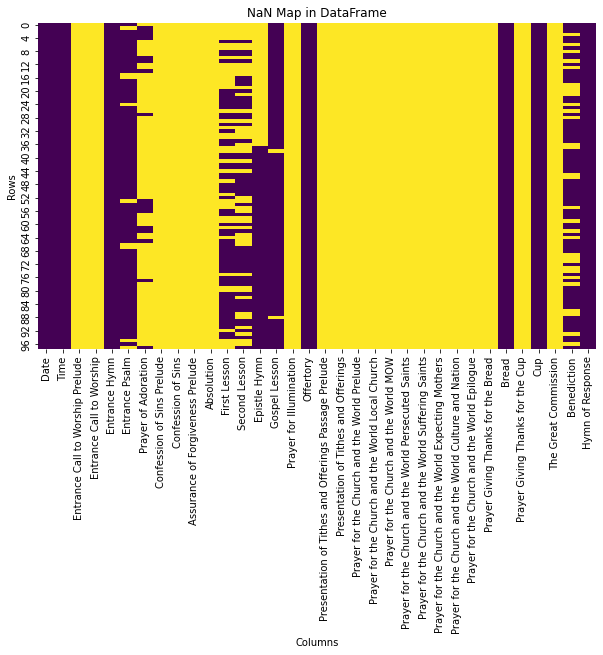

In [93]:


# Replace empty strings with NaN values
merged_df.replace('', np.nan, inplace=True)

# Create NaN map
nan_map = merged_df.isna()

# Visualize the NaN map
plt.figure(figsize=(10, 6))
sns.heatmap(nan_map, cmap='viridis', cbar=False)
plt.title('NaN Map in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [94]:
# Assuming merged_df is your DataFrame containing 'Date' and 'Time' columns

# Initialize variables
current_value = merged_df['Time'].iloc[0]
count = 1

# Iterate over the 'Time' column
for i in range(1, len(merged_df)):
    if merged_df['Time'].iloc[i] == current_value:
        count += 1
        merged_df.at[i, 'Time'] = f"{count}{'th' if count > 3 else ['st', 'nd', 'rd'][count - 1]} Sunday in {current_value}"
    else:
        current_value = merged_df['Time'].iloc[i]
        count = 1

# Display the updated DataFrame


         Date                     Time  Entrance Call to Worship Prelude  \
0  2022-01-02                Christmas                               NaN   
1  2022-01-09                 Epiphany                               NaN   
2  2022-01-16   2nd Sunday in Epiphany                               NaN   
3  2022-01-23   3rd Sunday in Epiphany                               NaN   
4  2022-01-30   4th Sunday in Epiphany                               NaN   
..        ...                      ...                               ...   
93 2023-10-22  19th Sunday in Ordinary                               NaN   
94 2023-10-29          Reformation Day                               NaN   
95 2023-11-05          All Saints' Day                               NaN   
96 2023-11-12                 Ordinary                               NaN   
97 2023-11-19   2nd Sunday in Ordinary                               NaN   

    Entrance Call to Worship                            Entrance Hymn  \
0             

In [95]:
merged_df

Date                     Time  Entrance Call to Worship Prelude  \
0  2022-01-02                Christmas                               NaN   
1  2022-01-09                 Epiphany                               NaN   
2  2022-01-16   2nd Sunday in Epiphany                               NaN   
3  2022-01-23   3rd Sunday in Epiphany                               NaN   
4  2022-01-30   4th Sunday in Epiphany                               NaN   
..        ...                      ...                               ...   
93 2023-10-22  19th Sunday in Ordinary                               NaN   
94 2023-10-29          Reformation Day                               NaN   
95 2023-11-05          All Saints' Day                               NaN   
96 2023-11-12                 Ordinary                               NaN   
97 2023-11-19   2nd Sunday in Ordinary                               NaN   

    Entrance Call to Worship                            Entrance Hymn  \
0                        NaN                  O Come, All Ye Faithful   
1                        NaN  Why Do the Heathen Nations Vainly Rage?   
2                        NaN                        From East to West   
3                        NaN         LORD, Our Lord, In All the Earth   
4                        NaN              Earth has Many a Noble City   
..                       ...                                      ...   
93                       NaN      All Praise to God, Who Reigns Above   
94                       NaN         Beneath the Blood-Stained Lintel   
95                       NaN        All People That on Earth Do Dwell   
96                       NaN            O Sing A New Song To The Lord   
97                       NaN                 At the Lamb’s High Feast   

    Entrance Psalm                                Prayer of Adoration  \
0            Psalm                                                NaN   
1              NaN  Blessed are You, O Lord the God of Jacob our F...   
2            Psalm  Your glory, Lord, is beyond human contemplatio...   
3            Psalm  Almighty God and our Heavenly Father, fill You...   
4            Psalm  Almighty and Heavenly Father, we, Your childre...   
..             ...                                                ...   
93        Psalm 96                                                NaN   
94           Psalm                                                NaN   
95             NaN                                                NaN   
96  Psalm Psalm 70                                                NaN   
97             NaN  Praise waits for You among Your people, Heaven...   

    Confession of Sins Prelude  Confession of Sins  \
0                          NaN                 NaN   
1                          NaN                 NaN   
2                          NaN                 NaN   
3                          NaN                 NaN   
4                          NaN                 NaN   
..                         ...                 ...   
93                         NaN                 NaN   
94                         NaN                 NaN   
95                         NaN                 NaN   
96                         NaN                 NaN   
97                         NaN                 NaN   

    Assurance of Forgiveness Prelude  ...  \
0                                NaN  ...   
1                                NaN  ...   
2                                NaN  ...   
3                                NaN  ...   
4                                NaN  ...   
..                               ...  ...   
93                               NaN  ...   
94                               NaN  ...   
95                               NaN  ...   
96                               NaN  ...   
97                               NaN  ...   

    Prayer for the Church and the World Expecting Mothers  \
0                                                 NaN       
1                             

In [96]:
merged_df.to_csv("best_book_yet.csv")

In [97]:
import json

# Read the JSON file
with open('worshipbook.json', 'r') as file:
    data = json.load(file)

# Sort the JSON data by key in ascending order
sorted_data = dict(sorted(data.items()))

# Display the sorted data
print(sorted_data)


{'2022-01-02': {'Line 1': '1st  LORD’S DAY-JANUARY 2, 2022   Second Sunday after Christmas', 'Line 5': '“We do not have a High Priest untouched by the feelings of our weaknesses; but was in every point tempted like we are, yet without sin.  Therefore, let us come boldly unto the throne of Grace, that we may obtain mercy, and find grace to help in our time of need!', 'Line 7': 'RISE and let us worship God!  We are gathered together this morning in the name of God the Father, God the Son, and God the Holy Spirit,', 'Line 8': 'Amen!', 'Line 9': 'For unto us a child is born;                                                                                                             \t\t\t Unto us a Son is given', 'Line 10': 'And the government shall be upon His shoulder: And His name shall be called:                                                                    \tWonderful, Counselor, the mighty God, the everlasting Father, the Prince of Peace.', 'Line 11': 'Glory to God in the Highest

In [98]:
sorted_data

{'2022-01-02': {'Line 1': '1st  LORD’S DAY-JANUARY 2, 2022   Second Sunday after Christmas',
  'Line 5': '“We do not have a High Priest untouched by the feelings of our weaknesses; but was in every point tempted like we are, yet without sin.  Therefore, let us come boldly unto the throne of Grace, that we may obtain mercy, and find grace to help in our time of need!',
  'Line 7': 'RISE and let us worship God!  We are gathered together this morning in the name of God the Father, God the Son, and God the Holy Spirit,',
  'Line 8': 'Amen!',
  'Line 9': 'For unto us a child is born;                                                                                                             \t\t\t Unto us a Son is given',
  'Line 10': 'And the government shall be upon His shoulder: And His name shall be called:                                                                    \tWonderful, Counselor, the mighty God, the everlasting Father, the Prince of Peace.',
  'Line 11': 'Glory to God in

In [99]:
import json

# Assuming sorted_data is your sorted dictionary
# Define the file path to save the JSON file
file_path = 'sorted_data.json'

# Save the sorted dictionary to a JSON file
with open(file_path, 'w') as file:
    json.dump(sorted_data, file, indent=4)

print(f"Sorted data has been saved to '{file_path}'.")


Sorted data has been saved to 'sorted_data.json'.


In [9]:
import json
import pandas as pd

# Open the JSON file and load it as song_dict
with open('sorted_data.json', 'r') as file:
    song_dict = json.load(file)

# Initialize an empty list to store the filtered data
filtered_data = []

# Iterate over the items in song_dict
for date, values in song_dict.items():
    for line, value in values.items():
        if "GREAT COMMISSION" in value:
            filtered_data.append({'Date': date, 'Value': value})
            break  # Stop searching for "GREAT COMMISSION" in this date entry once found

# Convert the filtered data list into a pandas DataFrame
df = pd.DataFrame(filtered_data)

# Display the DataFrame
df

Date                                              Value
0   2022-01-02     * THE GREAT COMMISSION        Matthew 28:18-20
1   2022-01-09    * THE GREAT COMMISSION       ..Matthew 28:18-20
2   2022-01-16                  GREAT COMMISSION Matthew 28:18-20
3   2022-01-23                  GREAT COMMISSION Matthew 28:18-20
4   2022-01-30                  GREAT COMMISSION Matthew 28:18-20
..         ...                                                ...
70  2023-10-22     *THE GREAT COMMISSION            Luke 24:46-48
71  2023-10-29    * THE GREAT COMMISSION             ... Acts 1:8
72  2023-11-05     *THE GREAT COMMISSION            Luke 24:46-48
73  2023-11-12  * THE GREAT COMMISSION            . MARK 16:15-19
74  2023-11-19  * THE GREAT COMMISSION            . MARK 16:15-19

[75 rows x 2 columns]

In [16]:
# Extract Bible references using regular expressions
df['Bible_Reference'] = df['Value'].str.extract(r'\b([A-Z][a-z]+(?:\s+[A-Z][a-z]+)?\s+\d+:\d+(?:-\d+)?)(?!\S)')

# Display the DataFrame with cleaned-up values
df

Date                                              Value  \
0  2022-01-02     * THE GREAT COMMISSION        Matthew 28:18-20   
1  2022-01-09    * THE GREAT COMMISSION       ..Matthew 28:18-20   
2  2022-01-16                  GREAT COMMISSION Matthew 28:18-20   
3  2022-01-23                  GREAT COMMISSION Matthew 28:18-20   
4  2022-01-30                  GREAT COMMISSION Matthew 28:18-20   
..        ...                                                ...   
70 2023-10-22     *THE GREAT COMMISSION            Luke 24:46-48   
71 2023-10-29    * THE GREAT COMMISSION             ... Acts 1:8   
72 2023-11-05     *THE GREAT COMMISSION            Luke 24:46-48   
73 2023-11-12  * THE GREAT COMMISSION            . MARK 16:15-19   
74 2023-11-19  * THE GREAT COMMISSION            . MARK 16:15-19   

     Bible_Reference  
0   Matthew 28:18-20  
1   Matthew 28:18-20  
2   Matthew 28:18-20  
3   Matthew 28:18-20  
4   Matthew 28:18-20  
..               ...  
70     Luke 24:46-48  
71          Acts 1:8  
72     Luke 24:46-48  
73               NaN  
74               NaN  

[75 rows x 3 columns]

In [14]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Find the first and last Sundays in the 'Date' column
first_sunday = df['Date'].min() - pd.Timedelta(days=df['Date'].min().weekday())  # Go back to the previous Sunday
last_sunday = df['Date'].max() + pd.Timedelta(days=6 - df['Date'].max().weekday())  # Go forward to the next Sunday

# Generate a range of all Sundays between the first and last Sundays
all_sundays = pd.date_range(start=first_sunday, end=last_sunday, freq='W-SUN')

# Create a DataFrame with the Sundays in the range
sundays_df = pd.DataFrame({'Date': all_sundays})

# Merge the original DataFrame with the Sundays DataFrame to fill in missing Sundays
merged_df = pd.merge(sundays_df, df, on='Date', how='left')

# Display the merged DataFrame
merged_df

Date                                              Value  \
0  2022-01-02     * THE GREAT COMMISSION        Matthew 28:18-20   
1  2022-01-09    * THE GREAT COMMISSION       ..Matthew 28:18-20   
2  2022-01-16                  GREAT COMMISSION Matthew 28:18-20   
3  2022-01-23                  GREAT COMMISSION Matthew 28:18-20   
4  2022-01-30                  GREAT COMMISSION Matthew 28:18-20   
..        ...                                                ...   
94 2023-10-22     *THE GREAT COMMISSION            Luke 24:46-48   
95 2023-10-29    * THE GREAT COMMISSION             ... Acts 1:8   
96 2023-11-05     *THE GREAT COMMISSION            Luke 24:46-48   
97 2023-11-12  * THE GREAT COMMISSION            . MARK 16:15-19   
98 2023-11-19  * THE GREAT COMMISSION            . MARK 16:15-19   

     Bible_Reference  
0   Matthew 28:18-20  
1   Matthew 28:18-20  
2   Matthew 28:18-20  
3   Matthew 28:18-20  
4   Matthew 28:18-20  
..               ...  
94     Luke 24:46-48  
95          Acts 1:8  
96     Luke 24:46-48  
97               NaN  
98               NaN  

[99 rows x 3 columns]

In [15]:
merged_df.to_csv("commissions.csv")

In [43]:
import pandas as pd
import json

# Open the JSON file and load its contents into a nested dictionary
with open('sorted_data.json', 'r') as file:
    nested_dict = json.load(file)

# Initialize lists to store the extracted data
dates = []
values = []

# Iterate over the items in nested_dict
for date, values_dict in nested_dict.items():
    # Check if "Presentation of Tithes and Offering" is in the values
    if "Presentation of Tithes and Offering" in values_dict.values():
        # Find the next value after "Presentation of Tithes and Offering"
        next_value = None
        for key, value in values_dict.items():
            if next_value is not None:
                break
            if value == "Presentation of Tithes and Offering":
                next_value = values_dict.get(list(values_dict)[list(values_dict).index(key) + 1], None)
        
        # Append the date and value to the lists
        dates.append(date)
        values.append(next_value)

# Create a DataFrame
offertory_df = pd.DataFrame({'Date': dates, 'Value': values})
offertory_df['Date'] = pd.to_datetime(offertory_df['Date'])

# Display the DataFrame
offertory_df

# Create a DataFrame with all Sundays between '2022-01-02' and '2023-11-19'
all_sundays = pd.date_range(start='2022-01-02', end='2023-11-19', freq='W-SUN')
sundays_df = pd.DataFrame({'Date': all_sundays})

# Merge the existing data with the DataFrame containing all Sundays
merged_df = pd.merge(sundays_df, offertory_df, on='Date', how='left')

# Display the merged DataFrame
merged_df

import pandas as pd
import re

# Assuming merged_df is your DataFrame containing the data

# Define a function to extract Bible references from the "Value" column
def extract_bible_reference(value):
    if isinstance(value, str):
        # Regular expression pattern to match Bible references
        pattern = r'([A-Z][A-Z]+(?:\s+\d+:\d+(?:-\d+)?)?)'
        # Search for matches in the value
        matches = re.findall(pattern, value)
        # Join the matches into a single string, if any
        return ', '.join(matches) if matches else None
    else:
        return None

# Apply the function to extract Bible references and create the "Reference" column
merged_df['Reference'] = merged_df['Value'].apply(extract_bible_reference)

# Display the DataFrame with the extracted references
merged_df


Date                                              Value
0  2022-01-16  January 16th-MATTHEW 25:31-40 " When the Son o...
1  2022-01-23  January 23rd-MATTHEW 26:6-13 -- And when Jesus...
2  2022-03-06  March 6th-LUKE 12:15-- "Take heed and beware o...
3  2022-03-27  March 27th-LUKE 17:7-10 -- "And which of you, ...
4  2022-04-10  April 10th-Luke 21:1-4 -- And He looked up and...
5  2022-04-17  April 17th-JOHN 6:27  -- Do not labor for the ...
6  2022-06-19  Let Us Pray   Luke 21:1-4 -- And He looked up ...
7  2022-07-03  July 3rd: LEVITICUS 27:30 --'...all the tithe ...
8  2022-07-10  July 10th: DEUTERONOMY 8:3 -- "And you shall r...
9  2022-07-17  July 17th-DEUTERONOMY 8:7,9-10 -- "For the Lor...
10 2022-08-14                       DEUTERONOMY 15:7-8, 10-11 --
11 2022-08-21  DEUTERONOMY 24:19-22 -- "When you reap your ha...
12 2022-08-28                              DEUTERONOMY 26:12-13 
13 2022-09-11  September 11th-Hebrews 6:10 -- God is not unju...
14 2022-09-18  September 18th-Hebrews 13:1-3,16 -- Let brothe...
15 2022-09-25  September 25th-James 1:17-18 -- Every good gif...
16 2022-10-02  September 19th-Hebrews 13:1-3,16 -- Let brothe...
17 2022-10-09  -James 1:17-18 -- Every good gift and every pe...
18 2022-10-16  October 3-James 2:14-17 -- What does it profit...
19 2022-10-23   James 5:1-5 -- Come now, you rich, weep and h...
20 2022-10-30   October 31st -MATTHEW 5:23-24 Therefore if yo...
21 2022-11-06  November 7th -MATTHEW 6:2-4  When...you give a...
22 2022-11-27  MATTHEW  6:31-33 -- "...do not worry, saying, ...
23 2022-12-11  December 12th-MATTHEW 10:7-8 When Jesus sent o...
24 2022-12-18   Now he in the parable who received seed among...
25 2023-01-15  MATTHEW 25:31-40 " When the Son of Man comes i...
26 2023-01-22  -MATTHEW 26:6-13 -- And when Jesus was in Beth...
27 2023-01-29                                      MARK 8:34-38 
28 2023-02-12                                     MARK 10:23-27 
29 2023-02-26  LUKE 12:15-- "Take heed and beware of covetous...
30 2023-03-05  LUKE 12:16-21 -- Then He spoke a parable to th...
31 2023-03-12  LUKE 16:10-13 -- "He who is faithful in what i...
32 2023-03-19  LUKE 17:7-10 -- "And which of you, having a se...
33 2023-04-02  Luke 21:1-4 -- And He looked up and saw the ri...
34 2023-04-09  JOHN 6:27  -- Do not labor for the food which ...
35 2023-04-16  John 15:1-5 -- "I am the true vine, and My Fat...
36 2023-06-25  LEVITICUS 27:30 --'...all the tithe of the lan...
37 2023-07-02  DEUTERONOMY 8:3 -- "And you shall remember tha...
38 2023-08-06                       DEUTERONOMY 15:7-8, 10-11 --
39 2023-08-13  DEUTERONOMY 24:19-22 -- "When you reap your ha...
40 2023-08-20                              DEUTERONOMY 26:12-13 
41 2023-09-03  September 11th-Hebrews 6:10 -- God is not unju...
42 2023-09-10  Hebrews 13:1-3,16 -- Let brotherly love contin...
43 2023-09-17  September 25th-James 1:17-18 -- Every good gif...
44 2023-09-24  September 19th-Hebrews 13:1-3,16 -- Let brothe...
45 2023-10-01  -James 1:17-18 -- Every good gift and every pe...
46 2023-10-08  -James 2:14-17 -- What does it profit, my bret...
47 2023-10-15   James 5:1-5 -- Come now, you rich, weep and h...
48 2023-10-29  -MATTHEW 5:23-24 Therefore if you bring your g...
49 2023-11-05  November 7th -MATTHEW 6:2-4  When...you give a...
50 2023-11-19  DEUTERONOMY 8:3 -- "And you shall remember tha...

In [49]:
import pandas as pd
import json

# Open the JSON file and load its contents into a nested dictionary
with open('sorted_data.json', 'r') as file:
    nested_dict = json.load(file)

# Initialize lists to store the extracted data
dates = []
values = []

# Iterate over the items in nested_dict
for date, values_dict in nested_dict.items():
    # Check if "Presentation of Tithes and Offering" is in the values
    if "Nicene Creed" in values_dict.values():
        # Find the next value after "Presentation of Tithes and Offering"
        next_value = None
        for key, value in values_dict.items():
            if next_value is not None:
                break
            if value == "Nicene Creed":
                next_value = values_dict.get(list(values_dict)[list(values_dict).index(key) - 1], None)
        
        # Append the date and value to the lists
        dates.append(date)
        values.append(next_value)

# Create a DataFrame
offertory_df = pd.DataFrame({'Date': dates, 'Value': values})
offertory_df['Date'] = pd.to_datetime(offertory_df['Date'])

# Display the DataFrame
offertory_df

# Create a DataFrame with all Sundays between '2022-01-02' and '2023-11-19'
all_sundays = pd.date_range(start='2022-01-02', end='2023-11-19', freq='W-SUN')
sundays_df = pd.DataFrame({'Date': all_sundays})

# Merge the existing data with the DataFrame containing all Sundays
merged_df = pd.merge(sundays_df, offertory_df, on='Date', how='left')



# Display the DataFrame with the extracted references
merged_df


Date                                              Value
0  2022-01-02  Now our Father as we come to Your table,  we o...
1  2022-01-09                                                NaN
2  2022-01-16  And now, our Heavenly Father, having received ...
3  2022-01-23  And now O God, before Whose face the generatio...
4  2022-01-30  Finally, O God and Father, grant that we who a...
..        ...                                                ...
94 2023-10-22  All these things and whatever else You know th...
95 2023-10-29  Now our Father as we come to Your table, we th...
96 2023-11-05  And now, our Heavenly Father, As we approach t...
97 2023-11-12  All these things and whatever else You see tha...
98 2023-11-19  And now, our Heavenly Father, as we approach Y...

[99 rows x 2 columns]

In [51]:
merged_df.to_csv("prayer_world_epilogue.csv")

In [53]:
import json
import pandas as pd

# Load the nested dictionary from the JSON file
with open('sorted_data.json', 'r') as file:
    nested_dict = json.load(file)

# Function to find the closest value containing "For You are gracious"
def find_closest_gracious_value(values_dict):
    try:
        nicene_creed_index = list(values_dict.values()).index("Nicene Creed")
    except ValueError:
        return None
    
    for key, value in list(values_dict.items())[nicene_creed_index:]:
        if "For You are gracious" in value:
            return value

# Initialize lists to store the extracted data
dates = []
combined_values = []

# Iterate over the items in the nested dictionary
for date, values_dict in nested_dict.items():
    # Find the closest value containing "For You are gracious"
    closest_gracious_value = find_closest_gracious_value(values_dict)
    
    # If a closest value is found, extract values between "Nicene Creed" and the closest gracious value
    if closest_gracious_value:
        nicene_creed_index = list(values_dict.values()).index("Nicene Creed")
        closest_gracious_index = list(values_dict.values()).index(closest_gracious_value)
        combined_values.append(" ".join(list(values_dict.values())[nicene_creed_index + 1:closest_gracious_index]))
    else:
        combined_values.append(None)
    
    dates.append(date)

# Create a DataFrame
combined_values_df = pd.DataFrame({'Date': dates, 'Combined_Values': combined_values})
combined_values_df['Date'] = pd.to_datetime(combined_values_df['Date'])

# Display the DataFrame
print(combined_values_df)


         Date Combined_Values
0  2022-01-02            None
1  2022-01-09            None
2  2022-01-16            None
3  2022-01-23            None
4  2022-01-30            None
..        ...             ...
93 2023-10-22            None
94 2023-10-29            None
95 2023-11-05            None
96 2023-11-12            None
97 2023-11-19            None

[98 rows x 2 columns]


In [54]:
import pandas as pd

# Read CSV file into DataFrame
df = pd.read_csv('New Worship Book Responses.csv')

# Convert DataFrame to JSON
json_data = df.to_json(orient='records')

# Print or save the JSON data
print(json_data)

# If you want to save the JSON data to a file
with open('Responses-test.json', 'w') as f:
    f.write(json_data)

[{"Timestamp":"1\/15\/2024 17:45:00","Lord's Day Date":"2022-01-02","Time of Year":"2nd Sunday in Christmas","Entrance Call to Worship Prelude":"We do not have a High Priest untouched by the feelings of our weaknesses; but was in every point tempted like we are, yet without sin. Therefore, let us come boldly unto the throne of Grace, that we may obtain mercy, and find grace to help in our time of need!","Entrance Call to Worship":"For Unto Us A Child Is Born Unto Us A Son Is Given And The Government Shall Be Upon His Shoulder: And His Name Shall Be Called Wonderful Counselor, The Mighty God, The Everlasting Father, The Prince Of Peace. Glory To God In The Highest And On Earth, Peace And Goodwill Toward Men.","Entrance Hymn":"O Come, All Ye Faithful","Entrance Psalm":"Psalm 119:97-104","Prayer of Adoration":"Heavenly Father, We praise You for the noble and flawless Cornerstone which You laid to support and bear up Zion the Savior of Israel, Jesus our Lord, born to bring about the rising

In [61]:
import json



# Load JSON data
data = json.loads(json_data)

# Create HTML table string
html_table = '<table border="1">'
html_table += '<tr>'
for key in data[0].keys():
    html_table += '<th>{}</th>'.format(key)
html_table += '</tr>'
for row in data:
    html_table += '<tr>'
    for value in row.values():
        html_table += '<td height="50">{}</td>'.format(value)
    html_table += '</tr>'
html_table += '</table>'

# Display or save the HTML table
print(html_table)

<table border="1"><tr><th>Timestamp</th><th>Lord's Day Date</th><th>Time of Year</th><th>Entrance Call to Worship Prelude</th><th>Entrance Call to Worship</th><th>Entrance Hymn</th><th>Entrance Psalm</th><th>Prayer of Adoration</th><th>Confession of Sins Prelude</th><th>Confession of Sins</th><th>Assurance of Forgiveness Prelude</th><th>Assurance of Forgiveness</th><th>First Lesson</th><th>Second Lesson</th><th>Epistle Hymn</th><th>Gospel Lesson</th><th>Prayer for Illumination</th><th>Offertory Hymn</th><th>Presentation of Tithes and Offerings Passage Prelude</th><th>Presentation of Tithes and Offerings</th><th>Prayer for the Church and the World Prelude</th><th>Prayer for the Church and the World Local Church</th><th>Prayer for the Church and the World MOW</th><th>Prayer for the Church and the World Persecuted Saints</th><th>Prayer for the Church and the World Suffering Saints</th><th>Prayer for the Church and the World Expecting Mothers</th><th>Prayer for the Church and the World Cul

In [62]:
# If you want to save the HTML table to a file
with open('table.html', 'w') as f:
    f.write(html_table)